In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from Data_Collector import collect_and_preprocess_data
from Predictor import predict_sentiment

In [2]:
def collect_data_for_ticker(ticker):
    data = collect_and_preprocess_data(ticker)
    if not data:
        print(f"No articles found for {ticker}")
        return None
    df = pd.DataFrame(data)
    df['ml_sentiment'], df['confidence'] = zip(*df['title'].apply(predict_sentiment))
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    return df.sort_values('date', ascending=False, na_position='last')

In [3]:
def generate_report(df):
    print("\nSentiment Analysis Report")
    print("========================")
    print(f"Ticker: {df['ticker'].iloc[0]}")
    print(f"Number of articles analyzed: {len(df)}")
    print("\nSentiment Distribution:")
    print(df['ml_sentiment'].value_counts(normalize=True).to_string())
    print("\nTop 5 Most Recent Articles:")

    # Convert 'date' to datetime and sort
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    df_sorted = df.sort_values('date', ascending=False, na_position='last')

    for _, row in df_sorted.head().iterrows():
        print(f"\nDate: {row['date']}")
        print(f"Title: {row['title']}")
        print(f"Sentiment: {row['ml_sentiment']} (Confidence: {row['confidence']:.2f})")
        print(f"Source: {row['source']}")



In [4]:
def plot_sentiment_distribution(df):
    sentiment_counts = df['ml_sentiment'].value_counts()
    plt.figure(figsize=(10, 6))
    sentiment_counts.plot(kind='bar')
    plt.title(f"Sentiment Distribution for {df['ticker'].iloc[0]}")
    plt.xlabel("Sentiment")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

In [5]:
def plot_confidence_distribution(df):
    plt.figure(figsize=(10, 6))
    plt.hist(df['confidence'], bins=20, edgecolor='black')
    plt.title(f"Confidence Distribution for {df['ticker'].iloc[0]}")
    plt.xlabel("Confidence")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()


In [6]:
def plot_sentiment_vs_confidence(df):
    fig, ax = plt.subplots(figsize=(12, 6))
    
    sentiments = df['ml_sentiment'].unique()
    colors = ['#ff9999', '#66b3ff']
    
    for sentiment, color in zip(sentiments, colors):
        subset = df[df['ml_sentiment'] == sentiment]
        ax.scatter(subset['confidence'], np.random.normal(0, 0.05, size=len(subset)), 
                   alpha=0.6, c=color, label=sentiment)
    
    ax.set_title(f"Sentiment vs Confidence for {df['ticker'].iloc[0]}")
    ax.set_xlabel("Confidence")
    ax.set_yticks([])
    ax.set_ylabel("Sentiment")
    
    ax.legend()
    plt.tight_layout()
    plt.show()

Enter a stock ticker:  GOOG


Fetching news for GOOG...
Skipping article with missing data for GOOG

Sentiment Analysis Report
Ticker: GOOG
Number of articles analyzed: 18

Sentiment Distribution:
ml_sentiment
negative/neutral    0.777778
positive            0.222222

Top 5 Most Recent Articles:

Date: 2024-07-25 15:59:40+00:00
Title: Google shows investor patience with Big Tech's AI spending might be running short
Sentiment: negative/neutral (Confidence: 0.72)
Source: NewsAPI

Date: 2024-07-24 16:21:28+00:00
Title: Why Alphabet Stock Is Sinking Today
Sentiment: negative/neutral (Confidence: 0.91)
Source: NewsAPI

Date: 2024-07-24 16:01:13+00:00
Title: Alphabet (NASDAQ:GOOG) Posts Quarterly Earnings Results
Sentiment: positive (Confidence: 0.77)
Source: NewsAPI

Date: NaT
Title: Google AI systems make headway with math in progress toward reasoning
Sentiment: positive (Confidence: 0.94)
Source: Finnhub

Date: NaT
Title: OpenAI tests ChatGPT-powered search engine that could compete with Google
Sentiment: negative/neu

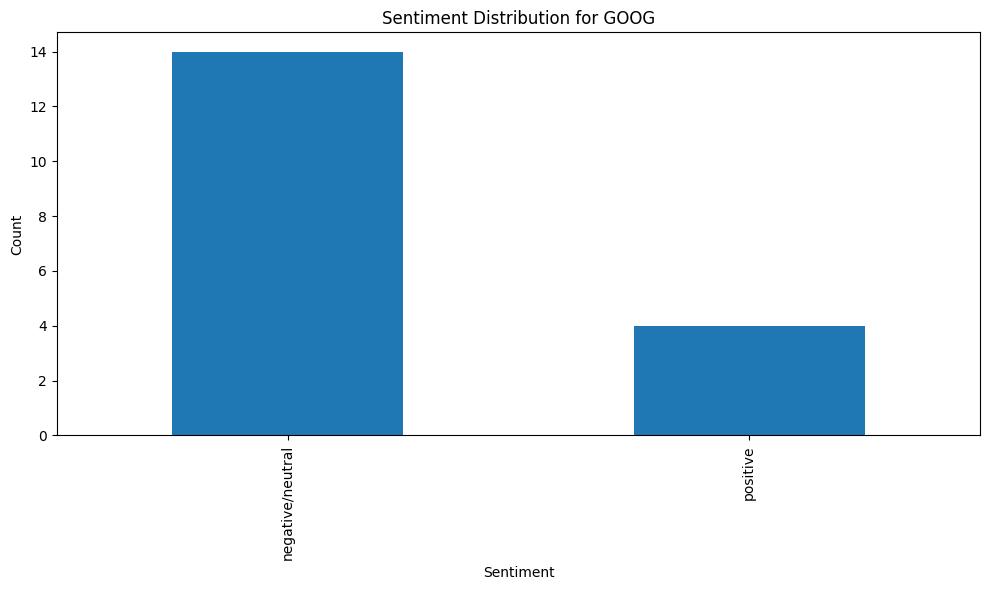

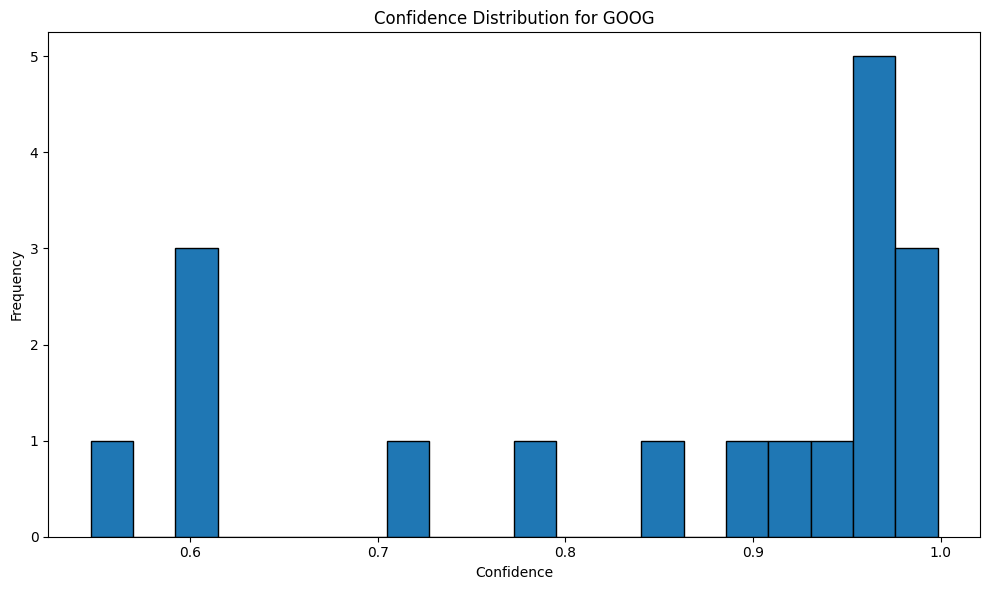

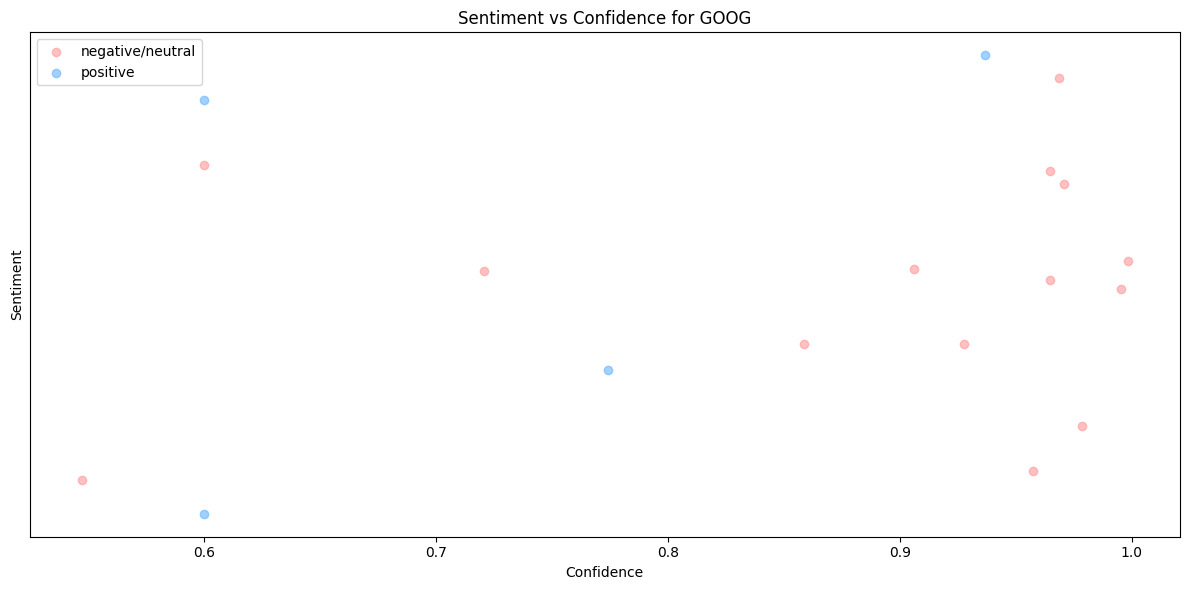

In [7]:
##This is a sample output. To test this yourself, run this block.

ticker = input("Enter a stock ticker: ").upper()
df = collect_data_for_ticker(ticker)

if df is not None and not df.empty:
    generate_report(df)
    plot_sentiment_distribution(df)
    plot_confidence_distribution(df)
    plot_sentiment_vs_confidence(df)
else:
    print("No relevant data found for the given ticker. Please try another.")